In [1]:
#!pip install transformers datasets

In [2]:
import pandas as pd
import datasets

import torch

In [3]:
train_data = pd.read_csv('./toy_dataset_label.csv',sep='\t',encoding='latin-1')
print(f'coumns:{[x for x in train_data.columns]}')

coumns:['ID', 'FILE', 'AUTHOR', 'BORN-DIED', 'TITLE', 'DATE', 'TECHNIQUE', 'LOCATION', 'FORM', 'TYPE', 'SCHOOL', 'TIMELINE', 'URL']


In [4]:
train_data.describe()

,ID
count,43455.000000
mean,21728.000000
std,12544.522311
min,1.000000
25%,10864.500000
50%,21728.000000
75%,32591.500000
max,43455.000000


In [5]:
train_data.head()

,ID,FILE,AUTHOR,BORN-DIED,TITLE,DATE,TECHNIQUE,LOCATION,FORM,TYPE,SCHOOL,TIMELINE,URL
0,1,1.jpg,"AACHEN, Hans von","(b. 1552, KÃ¶ln, d. 1615, Praha)",Allegory,1598,"Oil on copper, 56 x 47 cm","Alte Pinakothek, Munich",painting,mythological,German,1601-1650,http://www.wga.hu/html/a/aachen/allegory.html
1,2,2.jpg,"AACHEN, Hans von","(b. 1552, KÃ¶ln, d. 1615, Praha)","Bacchus, Ceres and Cupid",-,"Oil on canvas, 163 x 113 cm","Kunsthistorisches Museum, Vienna",painting,mythological,German,1601-1650,http://www.wga.hu/html/a/aachen/bacchus.html
2,3,3.jpg,"AACHEN, Hans von","(b. 1552, KÃ¶ln, d. 1615, Praha)",Joking Couple,-,"Copperplate, 25 x 20 cm","Kunsthistorisches Museum, Vienna",painting,genre,German,1601-1650,http://www.wga.hu/html/a/aachen/j_couple.html
3,4,4.jpg,"AACHEN, Hans von","(b. 1552, KÃ¶ln, d. 1615, Praha)",Portrait of Emperor Rudolf II,1590s,"Oil on canvas, 60 x 48 cm","Kunsthistorisches Museum, Vienna",painting,portrait,German,1601-1650,http://www.wga.hu/html/a/aachen/rudolf2.html
4,5,5.jpg,"AACHEN, Hans von","(b. 1552, KÃ¶ln, d. 1615, Praha)",Self-Portrait with a Glass of Wine,c. 1596,"Oil on canvas, 53 x 44 cm",Private collection,painting,portrait,German,1601-1650,http://www.wga.hu/html/a/aachen/selfport.html


In [6]:
import requests
from bs4 import BeautifulSoup,Comment
import numpy as np

def get_description(url):    
    r = requests.get(url)
    html_content = r.text

    soup = BeautifulSoup(html_content,'html.parser')

    comment = soup.find(string=lambda text: isinstance(text,Comment))
    if not comment:
        print('culo')
        return 0
    
    parent_element = comment.find_parent()
    p_tag=parent_element.find('p')
    text_content = ''.join(p_tag.stripped_strings)
    return text_content

In [ ]:
features = ['FILE','AUTHOR','TITLE','DATE','TECHNIQUE','URL']

train_data = train_data[features]
train_data = train_data[:500]
train_data.head()

,FILE,URL
0,1.jpg,http://www.wga.hu/html/a/aachen/allegory.html
1,2.jpg,http://www.wga.hu/html/a/aachen/bacchus.html
2,3.jpg,http://www.wga.hu/html/a/aachen/j_couple.html
3,4.jpg,http://www.wga.hu/html/a/aachen/rudolf2.html
4,5.jpg,http://www.wga.hu/html/a/aachen/selfport.html


In [8]:
from tqdm import tqdm

with tqdm(total=len(train_data)) as pbar:
    for idx in range(train_data.shape[0]):
        pbar.set_description(f'Art Piece N°: {idx}')
        train_data['FILE'][idx] = './toy_dataset/'+str(idx+1)+'.jpg'
        train_data['URL'][idx] = get_description(train_data['URL'][idx])
        pbar.update()


Art Piece N°: 128:  26%|██▌       | 128/500 [02:21<04:50,  1.28it/s]

culo


Art Piece N°: 129:  26%|██▌       | 129/500 [02:21<04:39,  1.33it/s]

culo


Art Piece N°: 130:  26%|██▌       | 130/500 [02:22<05:03,  1.22it/s]

culo


Art Piece N°: 131:  26%|██▌       | 131/500 [02:23<04:45,  1.29it/s]

culo


Art Piece N°: 132:  26%|██▋       | 132/500 [02:24<04:34,  1.34it/s]

culo


Art Piece N°: 133:  27%|██▋       | 133/500 [02:24<04:30,  1.36it/s]

culo


Art Piece N°: 134:  27%|██▋       | 134/500 [02:25<04:36,  1.32it/s]

culo


Art Piece N°: 135:  27%|██▋       | 135/500 [02:26<04:27,  1.37it/s]

culo


Art Piece N°: 136:  27%|██▋       | 136/500 [02:27<04:19,  1.40it/s]

culo


Art Piece N°: 137:  27%|██▋       | 137/500 [02:28<04:50,  1.25it/s]

culo


Art Piece N°: 138:  28%|██▊       | 138/500 [02:28<04:53,  1.23it/s]

culo


Art Piece N°: 139:  28%|██▊       | 139/500 [02:29<04:44,  1.27it/s]

culo


Art Piece N°: 140:  28%|██▊       | 140/500 [02:30<04:43,  1.27it/s]

culo


Art Piece N°: 141:  28%|██▊       | 141/500 [02:31<04:31,  1.32it/s]

culo


Art Piece N°: 142:  28%|██▊       | 142/500 [02:31<04:27,  1.34it/s]

culo


Art Piece N°: 143:  29%|██▊       | 143/500 [02:32<04:30,  1.32it/s]

culo


Art Piece N°: 144:  29%|██▉       | 144/500 [02:34<05:44,  1.03it/s]

culo


Art Piece N°: 145:  29%|██▉       | 145/500 [02:34<05:39,  1.05it/s]

culo


Art Piece N°: 146:  29%|██▉       | 146/500 [02:36<05:43,  1.03it/s]

culo


Art Piece N°: 147:  29%|██▉       | 147/500 [02:37<05:59,  1.02s/it]

culo


Art Piece N°: 242:  48%|████▊     | 242/500 [04:52<03:13,  1.33it/s]

culo


Art Piece N°: 251:  50%|█████     | 251/500 [04:59<03:19,  1.25it/s]

culo


Art Piece N°: 253:  51%|█████     | 253/500 [05:00<03:17,  1.25it/s]

culo


Art Piece N°: 254:  51%|█████     | 254/500 [05:01<03:19,  1.23it/s]

culo


Art Piece N°: 256:  51%|█████     | 256/500 [05:03<03:59,  1.02it/s]

culo


Art Piece N°: 257:  51%|█████▏    | 257/500 [05:05<04:07,  1.02s/it]

culo


Art Piece N°: 258:  52%|█████▏    | 258/500 [05:05<03:59,  1.01it/s]

culo


Art Piece N°: 259:  52%|█████▏    | 259/500 [05:06<03:41,  1.09it/s]

culo


Art Piece N°: 260:  52%|█████▏    | 260/500 [05:07<03:21,  1.19it/s]

culo


Art Piece N°: 261:  52%|█████▏    | 261/500 [05:08<03:08,  1.27it/s]

culo


Art Piece N°: 263:  53%|█████▎    | 263/500 [05:10<03:39,  1.08it/s]

culo


Art Piece N°: 264:  53%|█████▎    | 264/500 [05:11<03:36,  1.09it/s]

culo


Art Piece N°: 266:  53%|█████▎    | 266/500 [05:12<03:25,  1.14it/s]

culo


Art Piece N°: 267:  53%|█████▎    | 267/500 [05:13<03:14,  1.20it/s]

culo


Art Piece N°: 268:  54%|█████▎    | 268/500 [05:14<03:31,  1.10it/s]

culo


Art Piece N°: 269:  54%|█████▍    | 269/500 [05:18<07:22,  1.92s/it]

culo


Art Piece N°: 270:  54%|█████▍    | 270/500 [05:21<08:14,  2.15s/it]

culo


Art Piece N°: 271:  54%|█████▍    | 271/500 [05:22<06:35,  1.73s/it]

culo


Art Piece N°: 272:  54%|█████▍    | 272/500 [05:23<05:32,  1.46s/it]

culo


Art Piece N°: 273:  55%|█████▍    | 273/500 [05:23<04:43,  1.25s/it]

culo


Art Piece N°: 274:  55%|█████▍    | 274/500 [05:26<05:46,  1.53s/it]

culo


Art Piece N°: 275:  55%|█████▌    | 275/500 [05:27<05:37,  1.50s/it]

culo


Art Piece N°: 403:  81%|████████  | 403/500 [07:53<01:07,  1.43it/s]

culo


Art Piece N°: 404:  81%|████████  | 404/500 [07:54<01:05,  1.46it/s]

culo


Art Piece N°: 405:  81%|████████  | 405/500 [07:55<01:04,  1.46it/s]

culo


Art Piece N°: 406:  81%|████████  | 406/500 [07:55<01:04,  1.46it/s]

culo


Art Piece N°: 447:  89%|████████▉ | 447/500 [08:29<00:38,  1.36it/s]

culo


Art Piece N°: 448:  90%|████████▉ | 448/500 [08:30<00:37,  1.37it/s]

culo


Art Piece N°: 449:  90%|████████▉ | 449/500 [08:31<00:37,  1.35it/s]

culo


Art Piece N°: 450:  90%|█████████ | 450/500 [08:31<00:37,  1.32it/s]

culo


Art Piece N°: 451:  90%|█████████ | 451/500 [08:32<00:37,  1.32it/s]

culo


Art Piece N°: 452:  90%|█████████ | 452/500 [08:33<00:41,  1.17it/s]

culo


Art Piece N°: 453:  91%|█████████ | 453/500 [08:35<00:55,  1.18s/it]

culo


Art Piece N°: 454:  91%|█████████ | 454/500 [08:38<01:12,  1.57s/it]

culo


Art Piece N°: 455:  91%|█████████ | 455/500 [08:39<01:07,  1.49s/it]

culo


Art Piece N°: 456:  91%|█████████ | 456/500 [08:40<01:03,  1.45s/it]

culo


Art Piece N°: 457:  91%|█████████▏| 457/500 [08:41<00:54,  1.26s/it]

culo


Art Piece N°: 458:  92%|█████████▏| 458/500 [08:42<00:46,  1.11s/it]

culo


Art Piece N°: 459:  92%|█████████▏| 459/500 [08:43<00:42,  1.03s/it]

culo


Art Piece N°: 460:  92%|█████████▏| 460/500 [08:44<00:38,  1.04it/s]

culo


Art Piece N°: 461:  92%|█████████▏| 461/500 [08:44<00:36,  1.07it/s]

culo


Art Piece N°: 462:  92%|█████████▏| 462/500 [08:45<00:33,  1.13it/s]

culo


Art Piece N°: 463:  93%|█████████▎| 463/500 [08:46<00:31,  1.19it/s]

culo


Art Piece N°: 464:  93%|█████████▎| 464/500 [08:47<00:28,  1.25it/s]

culo


Art Piece N°: 465:  93%|█████████▎| 465/500 [08:47<00:28,  1.24it/s]

culo


Art Piece N°: 466:  93%|█████████▎| 466/500 [08:48<00:28,  1.20it/s]

culo


Art Piece N°: 467:  93%|█████████▎| 467/500 [08:49<00:26,  1.23it/s]

culo


Art Piece N°: 468:  94%|█████████▎| 468/500 [08:50<00:25,  1.23it/s]

culo


Art Piece N°: 469:  94%|█████████▍| 469/500 [08:51<00:24,  1.26it/s]

culo


Art Piece N°: 470:  94%|█████████▍| 470/500 [08:51<00:22,  1.31it/s]

culo


Art Piece N°: 471:  94%|█████████▍| 471/500 [08:52<00:22,  1.29it/s]

culo


Art Piece N°: 472:  94%|█████████▍| 472/500 [08:53<00:21,  1.31it/s]

culo


Art Piece N°: 473:  95%|█████████▍| 473/500 [08:54<00:20,  1.31it/s]

culo


Art Piece N°: 474:  95%|█████████▍| 474/500 [08:54<00:20,  1.29it/s]

culo


Art Piece N°: 476:  95%|█████████▌| 476/500 [08:56<00:18,  1.33it/s]

culo


Art Piece N°: 477:  95%|█████████▌| 477/500 [08:57<00:17,  1.33it/s]

culo


Art Piece N°: 499: 100%|██████████| 500/500 [09:20<00:00,  1.12s/it]


In [9]:
train_data.dropna()
train_data = train_data[train_data['URL'] != 0]

In [10]:
train_data = train_data.rename(columns={'FILE':'image','URL':'description'})

In [11]:
train_dataset = datasets.Dataset.from_dict(train_data).cast_column('image',datasets.Image())
print(train_dataset)

Dataset({
    features: ['image', 'description'],
    num_rows: 424
})


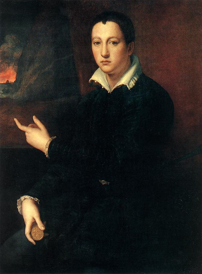

Description: Formerly the painting was attributed to Agnolo Bronzino. The sitter was assumed to be either Grand Duke Cosimo Medici II (1590-1621) or Grand Duke Ferdinando Medici (1551-1609). These assumptions are, however, not proven.


In [12]:
sample = train_dataset[260]

image = sample['image']
height,width = image.size
display(image.resize((int(0.3*height),int(0.3*width))))
caption = sample['description']
print(f'Description: {caption}')

In [13]:
from torch.utils.data import Dataset

class ImageCaptioningDataset(Dataset):
    
    def __init__(self, dataset, processor):
        self.dataset = dataset
        self.processor = processor

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        item = self.dataset[idx]
        encoding = self.processor(images=item["image"], text=item["description"], padding="max_length", return_tensors="pt", truncation=True)
        # remove batch dimension
        encoding = {k:v.squeeze() for k,v in encoding.items()}
        return encoding

In [14]:
from transformers import AutoProcessor

processor = AutoProcessor.from_pretrained("microsoft/git-base")

In [15]:
train_dataset = ImageCaptioningDataset(train_dataset, processor)

In [16]:
item = train_dataset[0]
for k,v in item.items():
    print(k,v.shape)

input_ids torch.Size([512])
attention_mask torch.Size([512])
pixel_values torch.Size([3, 224, 224])


In [23]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_dataset,shuffle=True,batch_size=2)

In [24]:
batch = next(iter(train_dataloader))
for k,v in batch.items():
    print(k,v.shape)

input_ids torch.Size([2, 512])
attention_mask torch.Size([2, 512])
pixel_values torch.Size([2, 3, 224, 224])


In [25]:
processor.decode(batch['input_ids'][0])

'[CLS] from 1830 one of the most popular artist in vienna. the full title of the painting is : rudolf von arthaber with his children, rudolf, emilie and gustav, looking at the portrait of their dead mother. [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [

In [26]:
from transformers import AutoModelForCausalLM

model = AutoModelForCausalLM.from_pretrained('microsoft/git-base')

In [27]:
outputs = model(input_ids=batch['input_ids'],
                attention_mask=batch['attention_mask'],
                pixel_values=batch['pixel_values'],
                labels=batch['input_ids'])

outputs.loss

tensor(11.6458, grad_fn=<NllLossBackward0>)

In [28]:
import torch

optimizer = torch.optim.AdamW(model.parameters(),lr=5e-5)

device = 'cuda' if torch.cuda.is_available() else 'cpu'
model.to(device)

model.train()

for epoch in range(2):
    print('Epoch:',epoch)
    for idx, batch in enumerate(train_dataloader):
        input_ids = batch.pop('input_ids').to(device)
        pixel_values=batch.pop('pixel_values').to(device)

        outputs = model(input_ids=input_ids,
                        pixel_values=pixel_values,
                        labels = input_ids)
        loss = outputs.loss

        print('Loss: ', loss.item())

        loss.backward()

        optimizer.step()
        optimizer.zero_grad()

Epoch: 0


OutOfMemoryError: CUDA out of memory. Tried to allocate 48.00 MiB (GPU 0; 6.00 GiB total capacity; 5.21 GiB already allocated; 0 bytes free; 5.27 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

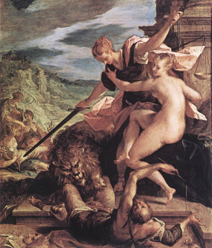

In [ ]:
sample = train_dataset[0]
image = sample['image']
height,width = image.size
display(image.resize((int(0.3*height),int(0.3*width))))

In [ ]:
inputs = processor(images = image, return_tensors='pt').to(device)
pixel_values = inputs.pixel_values

generated_ids = model.generate(pixel_values=pixel_values, max_length=50)
generated_caption = processor.batch_decode(generated_ids,skip_special_tokens=True)[0]
print(generated_caption)

the painting of the painting shows the painter, who was a young woman, who was the first of the artist, who was the most famous in the artist, and the first of the cr
